# Simulate some time series data 
Measurement systems are often diffcult to control for testing purposes. Noise changes every time in unpredicatable ways and it is really difficult to determine the actual true values lurking behind the various uncertainties. 

Simulating data allows us to test our analysis approaches against signals with known characteristics to see how well they work.

In [4]:
# gets all of numpy but you will still need to refer to e.g. numpy.random.randn() as random.randn()
from numpy import *               # all of the array capable elements for numerical data          
from scipy.stats import norm      # comprehensive functions for Gaussian normal distributions
import csv                        # library for reading and writing comma separated value files
from matplotlib.pyplot import *   # all of pyplot to graph the results of our calculations

# put figures inline in the notebook, so you don't have to call show()
%matplotlib inline

# This lets you make the default figure size larger (or smaller)
from IPython.core.pylabtools import figsize
figsize(14, 7)

Start by creating an array of discrete times when we would have sampled the temperature from our measurement system, then create a matching set of temperature values. Start with something boring like a steady room temperature. 

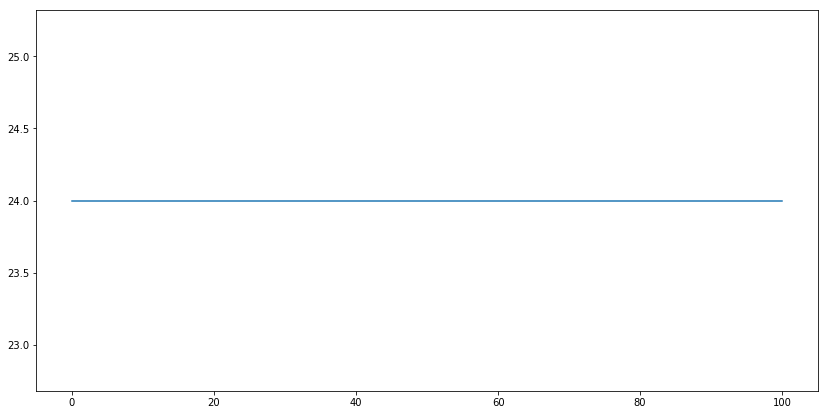

In [5]:
cnt =1000                    # number of elements in our time series
t = linspace(0,100,cnt)   # evenly spaced sampling times in a range
Tbar = 24                    # mean temperature
T = t*0 + Tbar  # a vector the same size as t with every value equal to Tbar
plot(t,T)

We can put a couple of step functions in to change the temperature by only acting on part of the T array. It would have to be a really fast sensor to follow these suddent changes, or maybe this is the ambient temperature felt by the sensor as it is moved quickly in and out of a refrigerator.

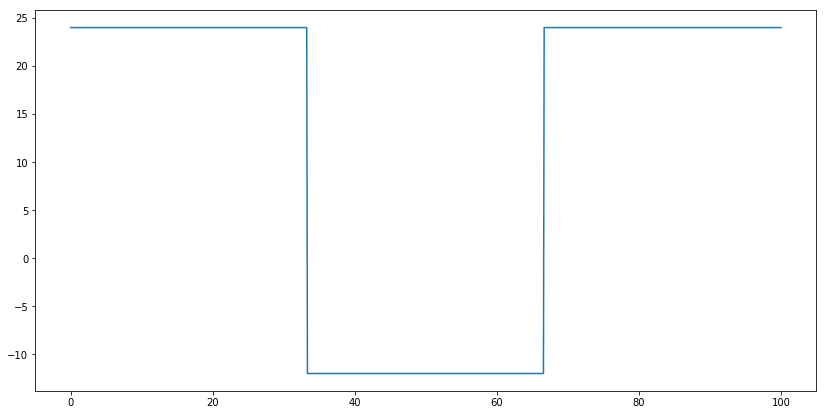

In [7]:
T[int(cnt/3):int(2*cnt/3)] -= 18
plot(t,T)

We can add any function we can define to create some time variation. This one is simple, although maybe unrealistic.

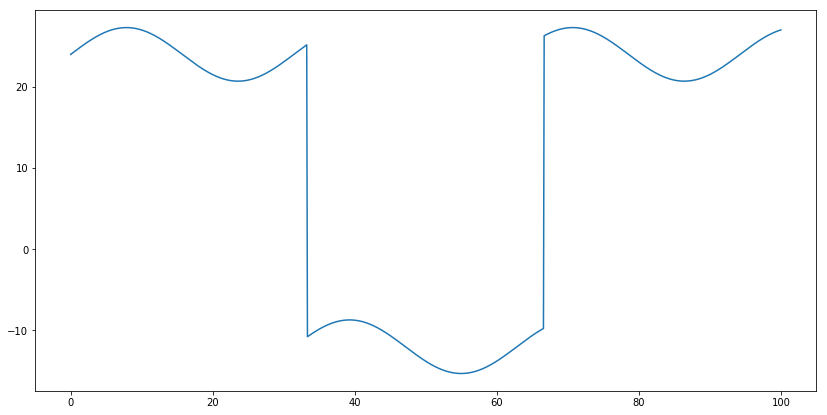

In [10]:
T += sin(t/5) * 1.1   # Slow oscillations are easier to imagine as real
plot(t,T)

Then we can add some noise with whatever characteristics we want. Here we are adding Gaussian noise with a standard deviation of 0.3 which as what we would expect to see if we knew the data was going to include a random uncertainty of 0.6 C on each temperature measurement. (Our standard of 95% probability for uncertainty corresponds to 2 standard deviations for a Gaussian distribution.)

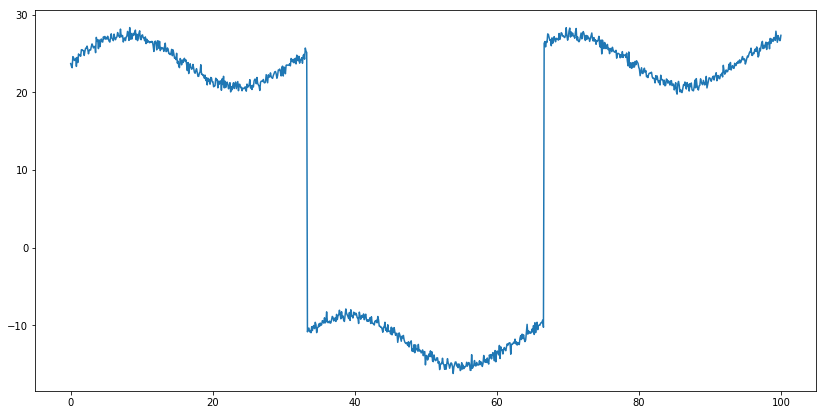

In [12]:
sigmaT = 0.3
T += sigmaT * random.randn(cnt)   # add some random gaussian normally distributed noise
plot(t,T)

Now we have two vectors t and T that we can use to test our signal processing on. This approach is really useful if you want to know the real characteristics of the signal without noise to compare to your results.


**Now you try:** Create and plot a series of temperature measurements that starts out at a steady value of 20C for a while, then increases linearly to 25C over a period of two minutes, then remains steady at 25C going forward. Add some random noise that corresponds to an uncertainty of plus/minus 1C.